# STSP == intuition

Here are some sanity checks that STSP is behaving like we think it's behaving.

Below are diagrams for each test case. 

In [85]:
from IPython.display import IFrame
IFrame("stsp_diagram.pdf", width=600, height=800)

In [29]:
%matplotlib inline

import sys
sys.path.insert(0, '/astro/users/bmmorris/git/friedrich/')
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from friedrich.stsp import STSP
from friedrich.lightcurve import LightCurve, hat11_params_morris_experiment, hat11_params_morris
import batman

params = batman.TransitParams()
params.t0 = 0.0
params.a = 15.0
params.rp = 0.05
params.inc = 90
params.b = 0
params.limb_dark = 'quadratic'
params.u = [0.64070, 0.04776]
params.w = 18
params.ecc = 0.27
params.per = 5

params.inc_stellar = 90
params.per_rot = 29.2
params.duration = 0.0979
params.lam = 0

params.rho_star = 1.8

times = np.arange(-0.8*params.duration, 0.8*params.duration, 1./60/24)
lc = LightCurve(times=times,
                fluxes=np.ones(len(times)), 
                errors=np.ones(len(times)))

**1)** Well-aligned star/planet system $\hat{n_s} = \hat{n_o}$, with a spot at $(\theta, \phi) = (90^\circ,\, 0^\circ)$ or (lat, lon) = (0, 0)

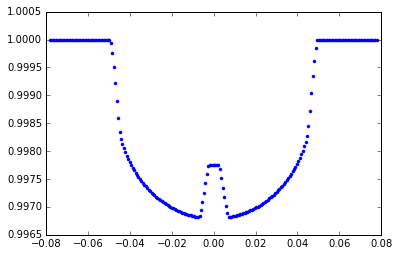

In [74]:
radius, theta, phi = 0.1, np.radians(90), np.radians(0)

s = STSP(lc, params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')

*** 

**2)** Nearly-aligned star/planet system where $i_o = 89.3^\circ$ (like HAT-11), with a spot at $(\theta, \phi) = (90^\circ,\, 0^\circ)$ or (lat, lon) = (0, 0).

The planet no longer occults the spot, since the planet's orbit carries the planet to negative $y$, below the spot at (lat, lon) = (0, 0).

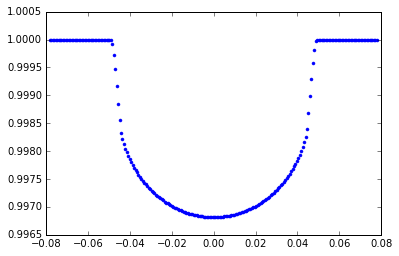

In [75]:
tmp_params = deepcopy(params)
tmp_params.inc = 89.3

radius, theta, phi = 0.1, np.radians(90), np.radians(0)

s = STSP(lc, tmp_params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')

***

**3)** The planet will occult the spot if we send the spot to lower latitudes (in the southern hemisphere). 

Nearly-aligned star/planet system where $i_o = 89.3^\circ$ (like HAT-11), with a spot at $(\theta, \phi) = (98^\circ,\, 0^\circ)$ or (lat, lon) = $(-8^\circ, 0^\circ)$.

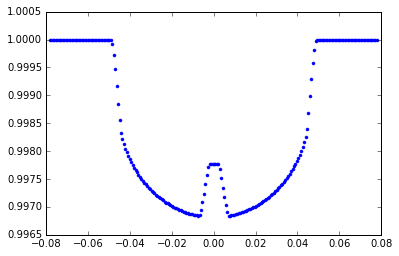

In [76]:
tmp_params = deepcopy(params)
tmp_params.inc = 89.3

radius, theta, phi = 0.1, np.radians(98), np.radians(0)

s = STSP(lc, tmp_params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')

The above plot confirms that the tilt of the planet's orbit $i_o$ sends the planet to negative $Y$ values when $X=0$, where it is occulting the southern hemisphere of the star in a nearly-aligned star/planet system.

***

**4)** Now let's misalign the planet/star so that $\hat{n_s} \perp \hat{n_o}$, with $i_o = 90^\circ$, with a spot at $(\theta, \phi) = (90^\circ,\, 0^\circ)$ or (lat, lon) = $(0^\circ, 0^\circ)$.


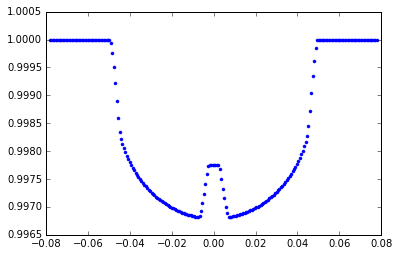

In [77]:
del tmp_params
tmp_params = deepcopy(params)
tmp_params.lam = 90

radius, theta, phi = 0.1, np.radians(90), np.radians(0)

s = STSP(lc, tmp_params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')

***

**5)** If we now incline the planet's orbit $i_o = 89.3^\circ$ (like HAT-11), the spot at $(\theta, \phi) = (90^\circ,\, 0^\circ)$ or (lat, lon) = $(0^\circ, 0^\circ)$ will not be occulted again.

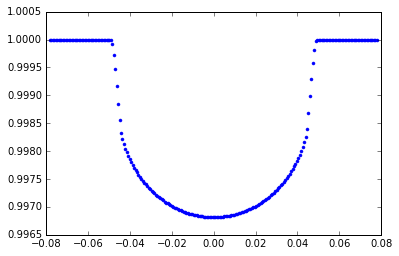

In [62]:
tmp_params = deepcopy(params)
tmp_params.lam = 90
tmp_params.inc = 89.3

radius, theta, phi = 0.1, np.radians(90), np.radians(0)

s = STSP(lc, tmp_params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')

*** 

**6)** We could now occult the spot if we offset the spot longitude (in the +$\hat{\phi}$ direction), by moving the spot to $(\theta, \phi) = (90^\circ,\, 8^\circ)$ or (lat, lon) = $(0^\circ, 8^\circ)$.

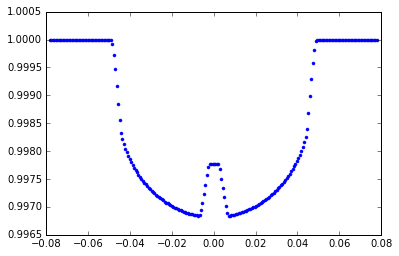

In [65]:
tmp_params = deepcopy(params)
tmp_params.lam = 90
tmp_params.inc = 89.3
tmp_params.inc_stellar = 90

radius, theta, phi = 0.1, np.radians(90), np.radians(8)

s = STSP(lc, tmp_params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')

***

**7)** Let's check that the planet is moving in the direction that we'd expect -- that is, it's traveling from left to right across the star, from $-\hat{X}$ to $+\hat{X}$. 

We'll check this by putting down two spots -- a small one on the center of the star, a larger one to the right at the same latitude, but greater longitude. If the planet is moving from $-\hat{X}$ to $+\hat{X}$, we would expect it to occult the smaller spot at mid-transit and the larger spot between mid-transit and egress.

| spot | lat | lon | 
|--------|-----|-----|
| spot 1 | 0  |  0  |
| spot 2 | 0  |  30  |



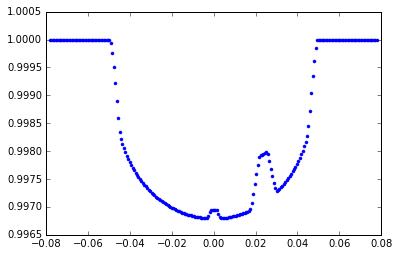

In [72]:
tmp_params = deepcopy(params)

radius1, theta1, phi1 = 0.02, np.radians(90), np.radians(0)
radius2, theta2, phi2 = 0.1, np.radians(90), np.radians(30)

s = STSP(lc, tmp_params, np.array([radius1, theta1, phi1, radius2, theta2, phi2]))
plt.plot(*s.stsp_lc(), '.')

***

**8)** For an antialigned star-planet system, you'd expect the same pattern as above, but reversed in time. Let's use the same spot positions as above, but set $\lambda = 180^\circ$, which effectively changes the direction of the planet's motion over the star.

| spot | lat | lon | 
|--------|-----|-----|
| spot 1 | 0  |  0  |
| spot 2 | 0  |  30  |



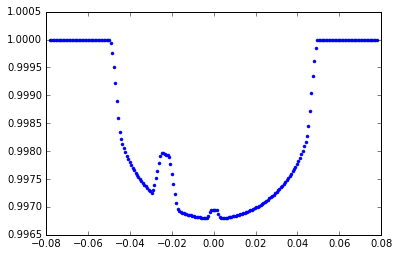

In [73]:
tmp_params = deepcopy(params)
tmp_params.lam = 180

radius1, theta1, phi1 = 0.02, np.radians(90), np.radians(0)
radius2, theta2, phi2 = 0.1, np.radians(90), np.radians(30)

s = STSP(lc, tmp_params, np.array([radius1, theta1, phi1, radius2, theta2, phi2]))
plt.plot(*s.stsp_lc(), '.')

***

**9)** Now let's check the stellar inclination angle. Starting from the misaligned system from **(4)** with $\hat{n_s} \perp \hat{n_o}$ with $i_o = 90^\circ$, with a spot at $(\theta, \phi) = (90^\circ,\, 0^\circ)$ or (lat, lon) = $(0^\circ, 0^\circ)$. 

We'll also offset the stellar inclination to $i_s = 60^\circ$ rather than $i_s = 90^\circ$ as it was in **(4)**, which we expect should move the spot occultation to earlier times, between ingress and mid-transit.

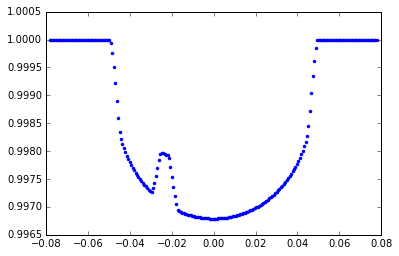

In [79]:
tmp_params = deepcopy(params)
tmp_params.lam = 90
tmp_params.inc_stellar = 60

radius, theta, phi = 0.1, np.radians(90), np.radians(0)

s = STSP(lc, tmp_params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')

***

**10)** Now let's check the stellar inclination angle going in the opposite direction. Starting from the misaligned system from **(4)** with $\hat{n_s} \perp \hat{n_o}$ with, $i_o = 90^\circ$, with a spot at $(\theta, \phi) = (90^\circ,\, 0^\circ)$ or (lat, lon) = $(0^\circ, 0^\circ)$. 

We'll also offset the stellar inclination to $i_s = 120^\circ$ rather than $i_s = 90^\circ$ as it was in **(4)**, which we expect should move the spot occultation to later times, between mid-transit and egress.

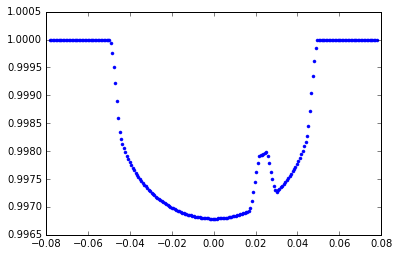

In [80]:
tmp_params = deepcopy(params)
tmp_params.lam = 90
tmp_params.inc_stellar = 120

radius, theta, phi = 0.1, np.radians(90), np.radians(0)

s = STSP(lc, tmp_params, np.array([radius, theta, phi]))
plt.plot(*s.stsp_lc(), '.')